# ***IMPORTING LIBRARIES***

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split

from statsmodels.tsa.arima.model import ARIMA

import sklearn

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import math

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

import numpy as np

import pandas as pd

from itertools import product

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import shutil
import pickle as pkl

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install --upgrade scikit-learn

# ***READING THE DATASET***

In [ ]:
amd=pd.read_csv('/content/AMD_(1980_-11.07.2023)[1].csv')
asus=pd.read_csv('/content/ASUS_(2000_-_11.07.2023)[1].csv')
intel=pd.read_csv('/content/INTEL_(1980_-_11.07.2023)[1].csv')
msi=pd.read_csv('/content/MSI_(2023_-_08.04.2024)[1].csv')
nvidia=pd.read_csv('/content/NVIDIA_(1999_-11.07.2023)[1].csv')

In [ ]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [ ]:
asus.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,438.747223,446.535675,436.151154,438.747223,89.092613,6.106176e+09
1,2000-01-06,440.045380,447.833862,436.151154,437.449310,88.829048,6.545984e+09
2,2000-01-07,432.256927,433.555084,425.766632,428.362701,86.983925,4.764317e+09
3,2000-01-10,434.853271,454.324158,434.853271,450.429901,91.464920,1.199988e+10
4,2000-01-11,463.410767,463.410767,442.641449,443.939606,90.146988,1.423350e+10


In [ ]:
intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.183718,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188162,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.187421,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.180754,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177050,8966400


In [ ]:
msi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,119.0,122.5,119.0,122.5,117.785713,1688380
1,2023-01-04,122.5,122.5,121.0,122.0,117.304955,1214832
2,2023-01-05,123.0,124.0,122.5,123.5,118.747231,2223376
3,2023-01-06,123.5,124.5,123.0,124.0,119.227989,915155
4,2023-01-09,125.0,126.0,124.5,126.0,121.151016,2305489


In [ ]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200


# ***CHECKING FOR MISSING VALUES***

In [ ]:
print(amd.isnull().values.any())
print(amd.isnull().sum())

False
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(asus.isnull().values.any())

True


In [ ]:
print(asus.isnull().sum())

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64


In [ ]:
print(intel.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(msi.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(nvidia.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# ***DATA MANIPULATION***

In [ ]:
asus=asus.dropna()

In [ ]:
data_list=[amd,asus,intel,msi,nvidia]
for data in data_list:
  data['Date']=pd.to_datetime(data['Date'])


# ***RESAMPLING THE DATA***

In [ ]:
data_list = [amd, asus, intel, msi,nvidia]

names = [0,1,2,3,4]

index = 0

for data in data_list:

  dates= data['Date']

  data['Company'] = np.repeat(names [index], len(data))

  data['Year'] = dates.dt.year

  data['Month'] = dates.dt.month

  data['Day'] = dates.dt.day

  index+=1

In [ ]:
data_list = [amd, asus, intel, msi, nvidia]
test_data = []
train_data = []
for data in data_list:
  train = data[: int(0.8*len(data))]
  test = data[int(0.8*len(data)):]
  train_data.append(train)
  test_data.append(test)
  print(test.shape, train.shape)

(2184, 11) (8735, 11)
(1150, 11) (4596, 11)
(2184, 11) (8735, 11)
(60, 11) (238, 11)
(1231, 11) (4923, 11)


# ***MERGING AND SPLITTING DATA INTO TEST AND TRAIN VARIABLES***

In [ ]:
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)
print(train_data.shape)
print(test_data.shape)

(27227, 11)
(6809, 11)


In [ ]:
x_train = train_data[['Open','High','Low','Volume','Year','Month', 'Day', 'Company']]
x_test = test_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Company']]
y_train = train_data['Close']
y_test = test_data['Close']
print(x_train. shape)
print(x_test. shape)
print(y_train. shape)
print(y_test. shape)

(27227, 8)
(6809, 8)
(27227,)
(6809,)


# ***DESCRIPTIVE STATISTICAL ANALYSIS***

In [ ]:
amd.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
mean,2001-11-02 08:46:51.686051840,16.842664,17.510743,16.761635,17.138932,17.138932,1.846495e+07,0.0,2001.338126,6.526605,15.738438
min,1980-03-18 00:00:00,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.0,1980.000000,1.000000,1.000000
25%,1991-01-03 12:00:00,4.960000,5.437500,5.125000,5.300000,5.300000,1.226100e+06,0.0,1991.000000,4.000000,8.000000
50%,2001-10-29 00:00:00,9.875000,10.062500,9.630000,9.875000,9.875000,6.833200e+06,0.0,2001.000000,7.000000,16.000000
75%,2012-08-29 12:00:00,16.125000,16.403125,15.805000,16.120001,16.120001,2.284015e+07,0.0,2012.000000,10.000000,23.000000
max,2023-07-10 00:00:00,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08,0.0,2023.000000,12.000000,31.000000
std,NaN,23.317716,23.609612,22.615398,23.121619,23.121619,2.815631e+07,0.0,12.509742,3.422874,8.748574


In [ ]:
asus.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,5746,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5.746000e+03,5746.0,5746.000000,5746.000000,5746.000000
mean,2011-08-26 14:55:25.583014144,290.489678,293.667370,287.055492,290.235818,128.518523,1.016665e+09,1.0,2011.146189,6.584929,15.835712
min,2000-01-05 00:00:00,127.106941,130.196335,127.106941,130.196335,28.863441,0.000000e+00,1.0,2000.000000,1.000000,1.000000
25%,2005-07-07 06:00:00,234.528175,237.000000,231.808762,234.500000,76.379619,1.696000e+06,1.0,2005.000000,4.000000,8.000000
50%,2011-10-05 12:00:00,278.000000,280.000000,275.409851,278.000000,120.188485,3.186387e+06,1.0,2011.000000,7.000000,16.000000
75%,2017-08-10 18:00:00,330.087112,334.000000,326.500000,330.000000,163.233246,8.475086e+08,1.0,2017.000000,10.000000,23.000000
max,2023-07-10 00:00:00,567.667419,575.104126,547.836243,565.188538,314.543518,2.833812e+10,1.0,2023.000000,12.000000,31.000000
std,NaN,75.957579,76.739552,74.935856,75.602517,66.079585,2.177426e+09,0.0,6.866389,3.413409,8.715091


In [ ]:
intel.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
mean,2001-11-02 08:46:51.686051840,19.897342,20.169676,19.627548,19.896781,14.668655,5.052754e+07,2.0,2001.338126,6.526605,15.738438
min,1980-03-18 00:00:00,0.218750,0.218750,0.216146,0.216146,0.122972,0.000000e+00,2.0,1980.000000,1.000000,1.000000
25%,1991-01-03 12:00:00,1.343750,1.367188,1.320313,1.343750,0.764502,2.713025e+07,2.0,1991.000000,4.000000,8.000000
50%,2001-10-29 00:00:00,20.350000,20.650000,20.093750,20.370001,12.680091,4.450540e+07,2.0,2001.000000,7.000000,16.000000
75%,2012-08-29 12:00:00,30.115001,30.593750,29.670000,30.066250,19.987983,6.467910e+07,2.0,2012.000000,10.000000,23.000000
max,2023-07-10 00:00:00,75.625000,75.828125,73.625000,74.875000,63.348770,5.677088e+08,2.0,2023.000000,12.000000,31.000000
std,NaN,17.487968,17.729974,17.252020,17.487397,14.781238,3.481933e+07,0.0,12.509742,3.422874,8.748574


In [ ]:
msi.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,298,298.00000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.0,298.000000,298.000000,298.000000
mean,2023-08-22 00:38:39.463087360,166.42953,168.577181,164.082215,166.268456,163.188253,4.573212e+06,3.0,2023.197987,5.825503,15.694631
min,2023-01-03 00:00:00,119.00000,122.500000,119.000000,122.000000,117.304955,6.278910e+05,3.0,2023.000000,1.000000,1.000000
25%,2023-05-05 18:00:00,146.00000,147.125000,145.000000,146.500000,140.862091,2.619778e+06,3.0,2023.000000,3.000000,8.000000
50%,2023-08-22 12:00:00,170.00000,171.500000,168.000000,169.500000,167.750000,3.930778e+06,3.0,2023.000000,5.000000,16.000000
75%,2023-12-07 18:00:00,181.87500,184.000000,179.000000,181.500000,179.375000,5.518807e+06,3.0,2023.000000,9.000000,23.000000
max,2024-04-03 00:00:00,216.00000,216.500000,202.000000,211.000000,204.000000,2.313684e+07,3.0,2024.000000,12.000000,31.000000
std,NaN,20.22837,20.714162,19.507077,19.874694,21.059304,2.988958e+06,0.0,0.399152,3.565135,8.771167


In [ ]:
nvidia.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,6154,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6.154000e+03,6154.0,6154.000000,6154.000000,6154.000000
mean,2011-04-16 13:21:39.837504,34.055888,34.707315,33.394796,34.080465,33.818979,6.120887e+07,4.0,2010.792168,6.497725,15.732044
min,1999-01-25 00:00:00,0.348958,0.355469,0.333333,0.341146,0.313002,1.968000e+06,4.0,1999.000000,1.000000,1.000000
25%,2005-03-08 06:00:00,2.682084,2.768125,2.612500,2.685417,2.463874,3.443320e+07,4.0,2005.000000,4.000000,8.000000
50%,2011-04-14 12:00:00,4.371250,4.443750,4.280000,4.367500,4.024390,5.136085e+07,4.0,2011.000000,6.000000,16.000000
75%,2017-05-25 18:00:00,33.498124,34.356876,32.490626,33.403123,33.137190,7.449690e+07,4.0,2017.000000,9.000000,23.000000
max,2023-07-10 00:00:00,435.010010,439.899994,426.739990,438.079987,438.079987,9.230856e+08,4.0,2023.000000,12.000000,31.000000
std,NaN,67.420090,68.760909,66.069289,67.472837,67.479411,4.385313e+07,0.0,7.064137,3.419204,8.761435


# ***VISUAL ANALYSIS***

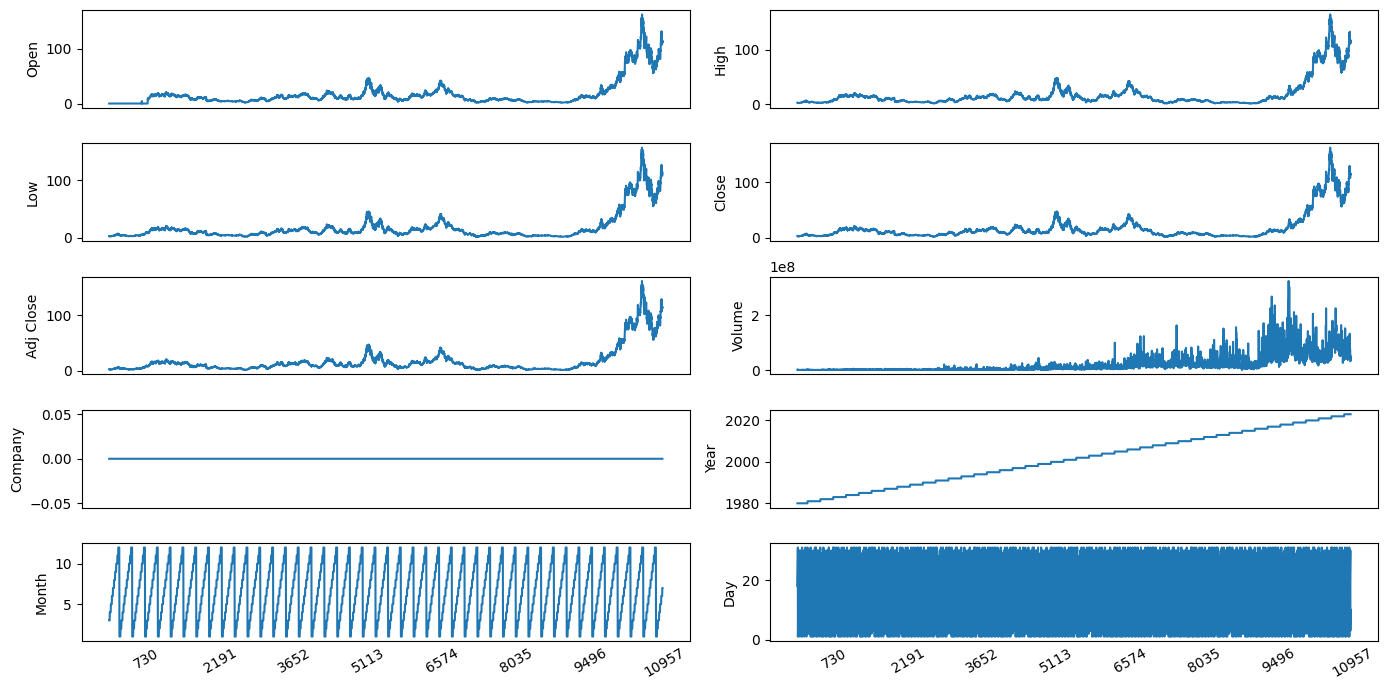

In [ ]:
import matplotlib.dates as mdates
# Plot line charts
df_plot = amd.drop(columns=['Date'])
ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
  sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
  ax.tick_params (axis="x", rotation=30, labelsize=10, length=0)
  ax.xaxis.set_major_locator (mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

# ***MODEL BUILDING***

# ***LINEAR REGRESSION***

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Test score:', lr.score(x_test,y_test))
print('Train score:',lr.score(x_train,y_train))

Test score: 0.9998494205258477
Train score: 0.9999100651971895


In [ ]:
y_pred=lr.predict(x_test)

print('r2_score:',r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))

r2_score: 0.9998494205258477
MAE: 0.7016780970601769


# ***Decision Tree Regressor***

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
print('Test score:',dt.score(x_test,y_test))
print('Train score:', dt.score(x_train,y_train))

Test score: 0.9976739076250707
Train score: 1.0


In [ ]:
y_pred =dt.predict(x_test)

print('r2_score:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))

r2_score: 0.9976739076250707
MAE: 2.2095448860331914


# ***EXTRA TREE REGRESSOR***

In [ ]:
etr=ExtraTreeRegressor()

etr.fit(x_train,y_train)

ExtraTreeRegressor()

In [ ]:
print('Test score:', etr.score(x_test,y_test))
print('Train score:', etr.score(x_train,y_train))

Test score: 0.997690113274739
Train score: 1.0


In [ ]:
y_pred=etr.predict(x_test)

print('r2_score:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))

r2_score: 0.997690113274739
MAE: 2.279093807166985


# ***RANDOM FOREST REGRESSOR***

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
print('Test score:',rf.score(x_test,y_test))
print('Train score:', rf.score(x_train,y_train))

Test score: 0.9981141715296304
Train score: 0.9999839073065099


In [ ]:
y_pred = rf.predict(x_test)
print('r2_score:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))

r2_score: 0.9981141715296304
MAE: 1.8530871275649885


# ***MODEL COMPARISION AND EVALUATING BEST MODEL***

In [ ]:
amd_dates = test_data[test_data['Company']==0] ['Date']
amd_pred = lr.predict(x_test [x_test['Company']==0])
amd_orig = test_data[test_data['Company']==0] ['Close']
asus_dates = test_data[test_data['Company']==1]['Date']
asus_pred = lr.predict(x_test [x_test['Company']==1])
asus_orig = test_data[test_data['Company']==1]['Close']
intel_dates = test_data[test_data['Company']==2]['Date']
intel_pred = lr.predict(x_test[x_test['Company']==2])
intel_orig = test_data[test_data['Company']==2]['Close']
msi_dates = test_data[test_data['Company']==3]['Date']
msi_pred = lr.predict(x_test[x_test['Company']==3])
msi_orig = test_data[test_data['Company']==3]['Close']
nvidia_dates = test_data[test_data['Company']==4]['Date']
nvidia_pred = lr.predict(x_test [x_test['Company']==4])
nvidia_orig = test_data[test_data['Company']==4]['Close']

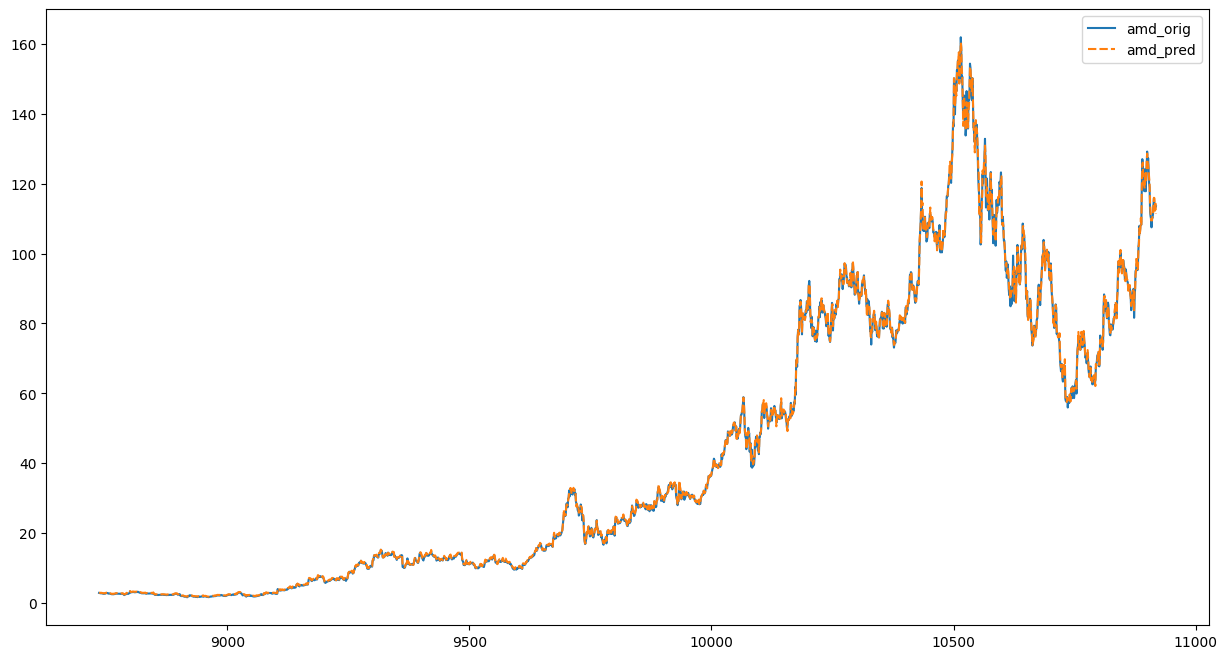

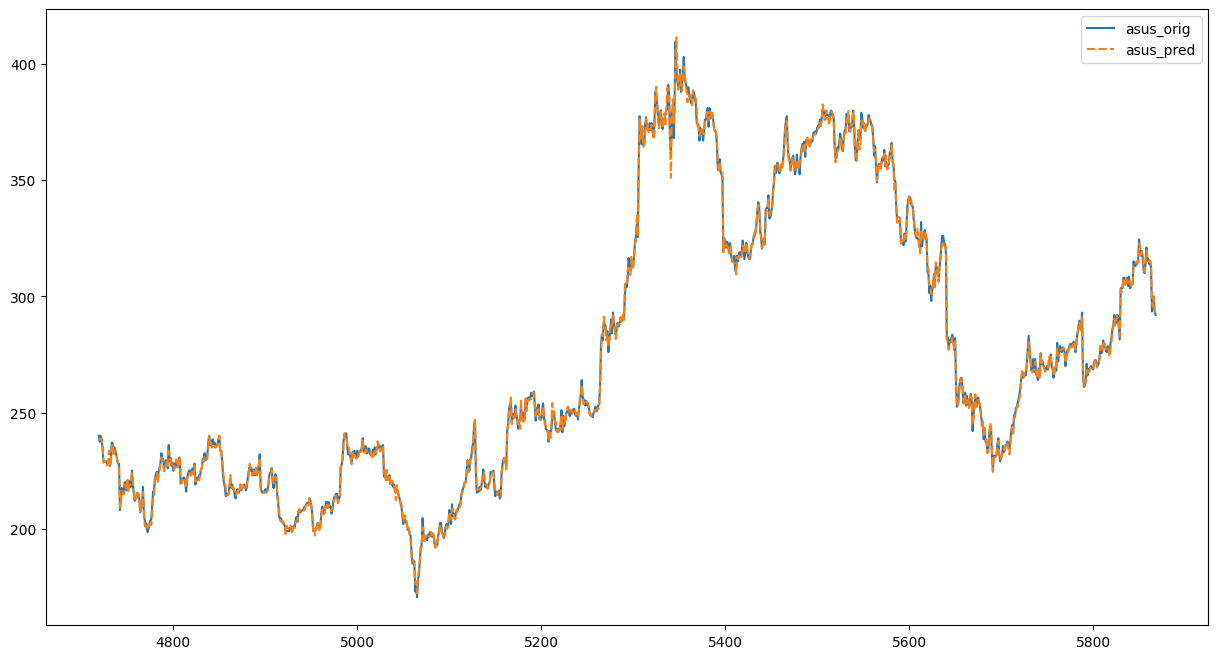

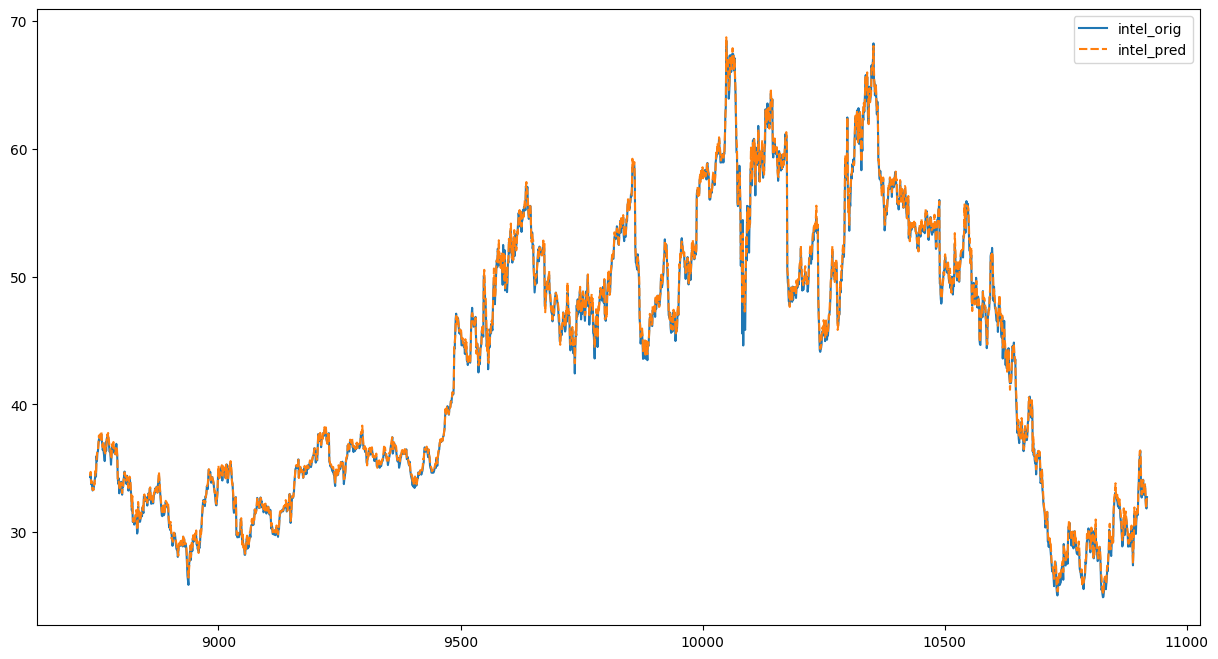

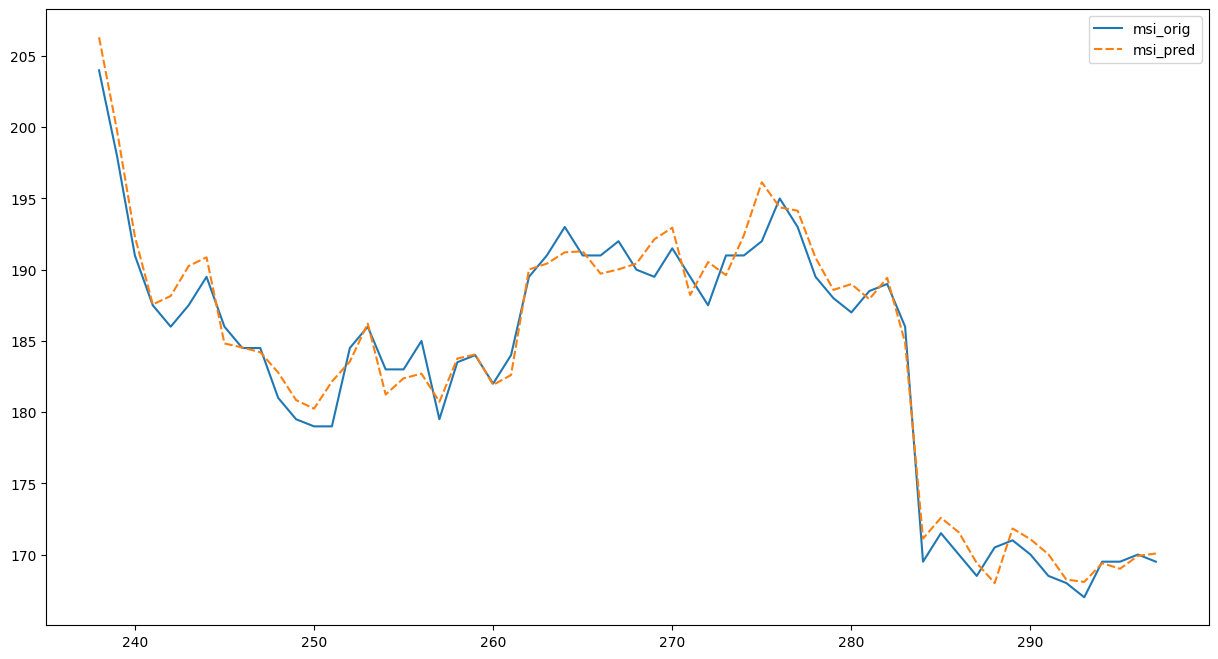

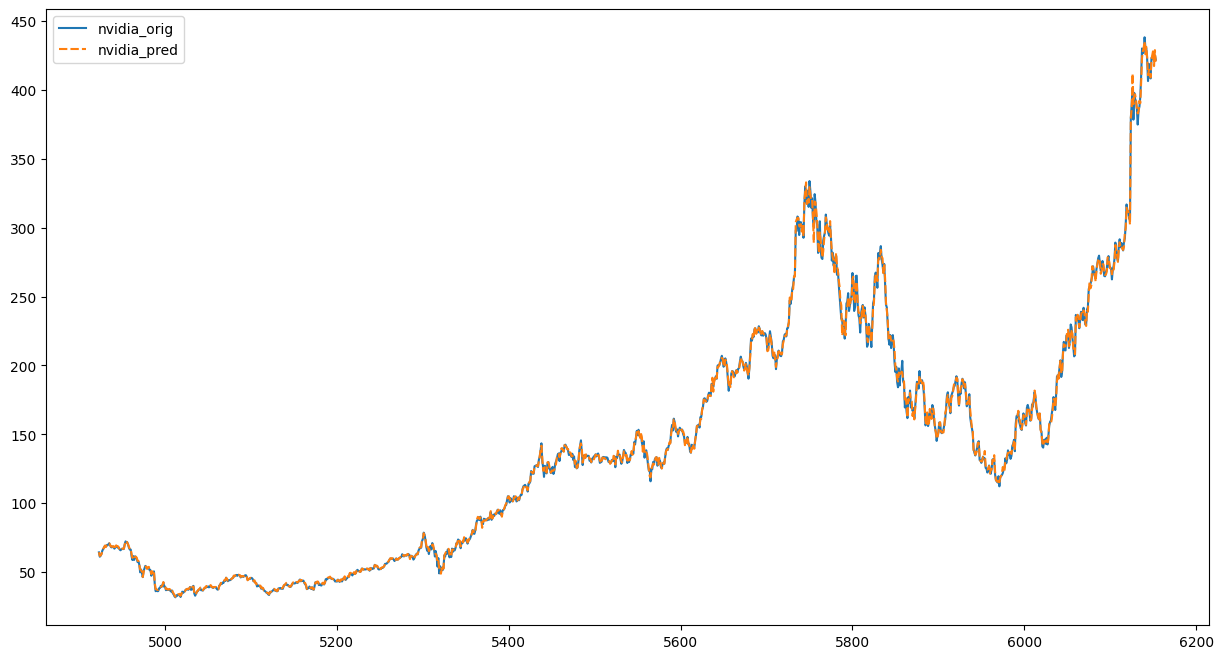

In [ ]:
combined_df = pd.DataFrame({
    'amd_orig': amd_orig,
    'amd_pred': amd_pred,

})

plt.figure(figsize=(15,8))
sns.lineplot(data=combined_df)
plt.show()

combined_df = pd.DataFrame({
    'asus_orig': asus_orig,
    'asus_pred': asus_pred,

})

plt.figure(figsize=(15,8))
sns.lineplot(data=combined_df)
plt.show()

combined_df = pd.DataFrame({
    'intel_orig': intel_orig,
    'intel_pred': intel_pred,

})

plt.figure(figsize=(15,8))
sns.lineplot(data=combined_df)
plt.show()

combined_df = pd.DataFrame({
    'msi_orig': msi_orig,
    'msi_pred': msi_pred,

})

plt.figure(figsize=(15,8))
sns.lineplot(data=combined_df)
plt.show()

combined_df = pd.DataFrame({
    'nvidia_orig': nvidia_orig,
    'nvidia_pred': nvidia_pred

})

plt.figure(figsize=(15,8))
sns.lineplot(data=combined_df)
plt.show()

# ***SAVING MODEL***

In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(lr,file)